# Scraping Wikipedia for World Coutnry Data

In [25]:
# Importing Cleaning Packages
import re
import pandas as pd
import numpy as np

# Importing Data Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Capturing World Population Data by Country

In [26]:
wikipedia = "https://en.wikipedia.org/wiki/" # Wikipedia Root URL
population = "List_of_countries_and_dependencies_by_population" # World Population Sub-URL

tables = pd.read_html(wikipedia + population)

population_df = tables[0]  # Index of the population data table

# Loop through each cell and remove brackets and their inner characters
for col in population_df.columns:
    population_df[col] = population_df[col].apply(lambda x: re.sub(r'\[.*?\]', '', str(x)))

# Drop the columns
population_df = population_df.drop(columns=['Unnamed: 0', 'Unnamed: 6'])

# Dropping unnecessary columns
population_df = population_df.drop(columns=['Date', 'Source (official or from the United Nations)'])

# Rename Columns
population_df = population_df.rename(columns={'% of world': '% of World Population'})

# Rename Columns
population_df = population_df.rename(columns={'Location': 'Country'})

# Display DataFrame
print(population_df)

# Save DataFrame to CSV
population_df.to_csv('page-data/population.csv', index=False)

                                 Country  Population % of World Population
0                                  World  8098555000                  100%
1                                  China  1409670000                 17.4%
2                                  India  1392329000                 17.2%
3                          United States   335893238                  4.1%
4                              Indonesia   279118866                  3.4%
..                                   ...         ...                   ...
236                                 Niue        1689                    0%
237                         Tokelau (NZ)        1647                    0%
238                         Vatican City         764                    0%
239  Cocos (Keeling) Islands (Australia)         593                    0%
240                Pitcairn Islands (UK)          47                    0%

[241 rows x 3 columns]


### Capturing World Nominal GDP Data by Country

In [27]:
nominal = "List_of_countries_by_GDP_(nominal)" # World GDP Nominal Sub-URL

tables = pd.read_html(wikipedia + nominal)

nominal_df = tables[2]  # Index of the nominal GDP data table

# Loop through each cell and remove brackets and their inner characters
for col in nominal_df.columns:
    nominal_df[col] = nominal_df[col].apply(lambda x: re.sub(r'\[.*?\]', '', str(x)))

# Drop unnecessary columns (Only Using IMF Data)
nominal_df = nominal_df.drop(columns=['World Bank[14]', 'United Nations[15]'])

# Remove the first level of the MultiIndex for columns
nominal_df.columns = nominal_df.columns.droplevel(0)

# Drop year column now that level has been reduced
nominal_df = nominal_df.drop(columns=['Year'])

# Rename Columns
nominal_df = nominal_df.rename(columns={'Country/Territory': 'Country', 'UN region': 'Region', 'Forecast':'IMF Nominal Forecast (millions)'})

# Replace World Region With String "N/A"
nominal_df.loc[0, 'Region'] = "N/A"

# Display DataFrame
print(nominal_df)

# Save DataFrame to CSV
nominal_df.to_csv('page-data/nominal.csv', index=False)

           Country    Region IMF Nominal Forecast (millions)
0            World       N/A                       104476432
1    United States  Americas                        26949643
2            China      Asia                        17700899
3          Germany    Europe                         4429838
4            Japan      Asia                         4230862
..             ...       ...                             ...
208          Palau   Oceania                             267
209       Kiribati   Oceania                             246
210          Nauru   Oceania                             150
211     Montserrat  Americas                               —
212         Tuvalu   Oceania                              63

[213 rows x 3 columns]


C:\Users\Lucas\AppData\Local\Temp\ipykernel_25068\2755435243.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  nominal_df = nominal_df.drop(columns=['World Bank[14]', 'United Nations[15]'])


### Capturing World PPP GDP Data by Country

In [28]:
ppp = "List_of_countries_by_GDP_(PPP)" # World GDP PPP Sub-URL

tables = pd.read_html(wikipedia + ppp)

ppp_df = tables[1]  # Index of the PPP GDP data table

# Loop through each cell and remove brackets and their inner characters
for col in ppp_df.columns:
    ppp_df[col] = ppp_df[col].apply(lambda x: re.sub(r'\[.*?\]', '', str(x)))

# Drop unnecessary columns (Only Using IMF Data)
ppp_df = ppp_df.drop(columns=['World Bank[6]', 'CIA[7][8][9]'])

# Remove the first level of the MultiIndex for columns
ppp_df.columns = ppp_df.columns.droplevel(0)


print(ppp_df.columns)
# Drop year column now that level has been reduced
ppp_df = ppp_df.drop(columns=['Year', 'UN region'])

# Rename Columns
ppp_df = ppp_df.rename(columns={'Country (or territory)': 'Country', 'Forecast':'IMF PPP Forecast (millions)'})

# Display DataFrame
print(ppp_df)

# Save DataFrame to CSV
ppp_df.to_csv('page-data/ppp.csv', index=False)

Index(['Country (or territory)', 'UN region', 'Forecast', 'Year'], dtype='object')
                                          Country IMF PPP Forecast (millions)
0                                           World                   183950000
1                                           China                    35042689
2                                   United States                    27966553
3                                           India                    14261176
4                                           Japan                     6710984
..                                            ...                         ...
224                                        Tuvalu                          63
225                             Wallis and Futuna                           —
226  Saint Helena, Ascension and Tristan da Cunha                           —
227                                          Niue                           —
228                                       Tokelau          

C:\Users\Lucas\AppData\Local\Temp\ipykernel_25068\1536647187.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppp_df = ppp_df.drop(columns=['World Bank[6]', 'CIA[7][8][9]'])


### Capturing World Size Data by Country

In [29]:
size = "List_of_countries_and_dependencies_by_area" # World Country Size Sub-URL

tables = pd.read_html(wikipedia + size)

size_df = tables[1]  # Index of the size data table

# Loop through each cell and remove brackets and their inner characters
for col in size_df.columns:
    size_df[col] = size_df[col].apply(lambda x: re.sub(r'\[.*?\]', '', str(x)))

# Drop unnecessary columns
size_df = size_df.drop(columns=['Unnamed: 0', 'Unnamed: 6', '% water'])

# Rename Columns
size_df = size_df.rename(columns={'Country / dependency': 'Country', 'Total in km2 (mi2)':'Total in km^2', 'Land in km2 (mi2)': 'Land in km^2', 'Water in km2 (mi2)': 'Water in km^2'})

# Loop through each cell in the specified columns and remove parentheses and their inner characters
cols_to_clean = ['Total in km^2', 'Land in km^2', 'Water in km^2']
size_df[cols_to_clean] = size_df[cols_to_clean].applymap(lambda x: re.sub(r'\(.*?\)', '', str(x)))

# Loop through each cell and remove commas and spaces (Prep for Float Conversion)
size_df[cols_to_clean] = size_df[cols_to_clean].applymap(lambda x: str(x).replace(' ', ''))
size_df[cols_to_clean] = size_df[cols_to_clean].applymap(lambda x: str(x).replace(',', ''))

# Convert the columns from strings to floats
size_df[cols_to_clean] = size_df[cols_to_clean].astype(float)

# Display DataFrame
print(size_df)

# Save DataFrame to CSV
size_df.to_csv('page-data/size.csv', index=False)

                                     Country  Total in km^2  Land in km^2  \
0                                      Earth   5.100720e+08  1.489400e+08   
1                                     Russia   1.709825e+07  1.637687e+07   
2                                 Antarctica   1.420000e+07  1.420000e+07   
3                                     Canada   9.984670e+06  9.093507e+06   
4                                      China   9.596960e+06  9.326410e+06   
..                                       ...            ...           ...   
259  Ashmore and Cartier Islands (Australia)   5.000000e+00  5.000000e+00   
260            Coral Sea Islands (Australia)   3.000000e+00  3.000000e+00   
261               Spratly Islands (disputed)   2.000000e+00  2.000000e+00   
262                                   Monaco   2.000000e+00  2.000000e+00   
263                             Vatican City   4.900000e-01  4.900000e-01   

     Water in km^2  
0      361132000.0  
1         721380.0  
2           

C:\Users\Lucas\AppData\Local\Temp\ipykernel_25068\3316318511.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  size_df[cols_to_clean] = size_df[cols_to_clean].applymap(lambda x: re.sub(r'\(.*?\)', '', str(x)))
C:\Users\Lucas\AppData\Local\Temp\ipykernel_25068\3316318511.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  size_df[cols_to_clean] = size_df[cols_to_clean].applymap(lambda x: str(x).replace(' ', ''))
C:\Users\Lucas\AppData\Local\Temp\ipykernel_25068\3316318511.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  size_df[cols_to_clean] = size_df[cols_to_clean].applymap(lambda x: str(x).replace(',', ''))


### Merge & Clean DataFrames into a Single DataFrame / CSV File 

In [30]:
# Merge World DataFrames using Primary Key: 'Country'
country_df = population_df.merge(nominal_df, on='Country', how='outer')
country_df = country_df.merge(ppp_df, on='Country', how='outer')
country_df = country_df.merge(size_df, on='Country', how='outer')

# Remove all observations with empty & NaN values
country_df = country_df.replace('—', np.nan)
country_df = country_df.dropna()

# Display DataFrame
print(country_df)

# Save DataFrame to CSV
country_df.to_csv('country.csv', index=False)

                 Country Population % of World Population    Region  \
4                Albania    2761785                 0.03%    Europe   
5                Algeria   45400000                  0.6%    Africa   
8                Andorra      85101                0.001%    Europe   
9                 Angola   34094077                  0.4%    Africa   
13   Antigua and Barbuda     100772                0.001%  Americas   
..                   ...        ...                   ...       ...   
292            Venezuela   28302000                  0.3%  Americas   
293              Vietnam  100300000                  1.2%      Asia   
298                Yemen   31888698                  0.4%      Asia   
299               Zambia   19610769                  0.2%    Africa   
301             Zimbabwe   15178979                  0.2%    Africa   

    IMF Nominal Forecast (millions) IMF PPP Forecast (millions)  \
4                             23032                       55928   
5            

### Question 2: Is there a correlation between population and nominal GDP?

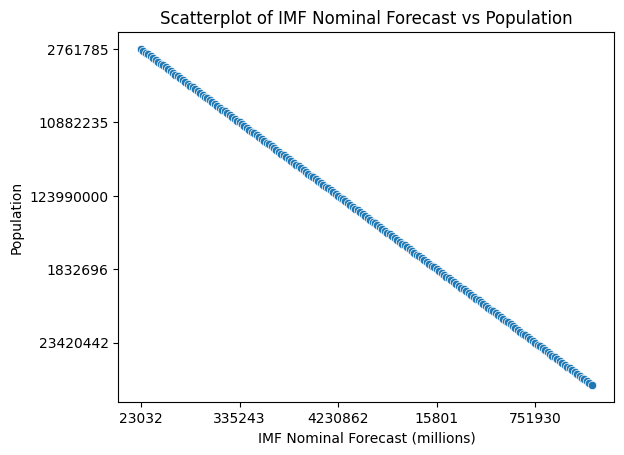

In [31]:
# Create a scatterplot
sns.scatterplot(data=country_df, x='IMF Nominal Forecast (millions)', y='Population')

# Set plot title and labels
plt.title('Scatterplot of IMF Nominal Forecast vs Population')
plt.xlabel('IMF Nominal Forecast (millions)')
plt.ylabel('Population')

# Adjust the number of ticks on the x and y axes
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(6))

# Show the plot
plt.show()

##### Smaller Sample Size

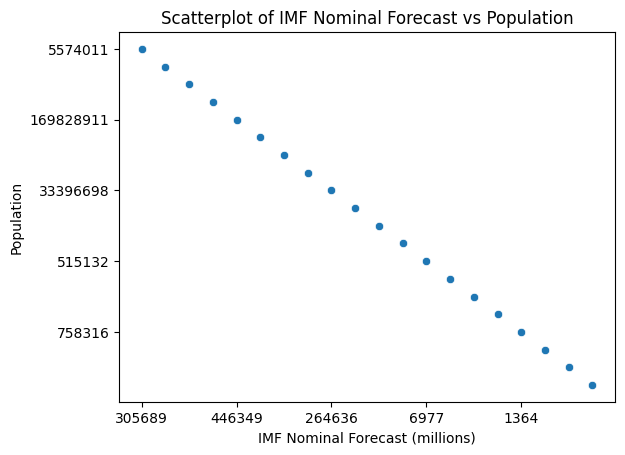

In [32]:
# Select 20 random rows
random_rows = country_df.sample(20)

# Create a scatterplot
sns.scatterplot(data=random_rows, x='IMF Nominal Forecast (millions)', y='Population')

# Set plot title and labels
plt.title('Scatterplot of IMF Nominal Forecast vs Population')
plt.xlabel('IMF Nominal Forecast (millions)')
plt.ylabel('Population')

# Adjust the number of ticks on the x and y axes
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(6))

# Show the plot
plt.show()

#### Answer to Question 2: Yes, clear correlation.

### Question 3: Is there a relationship between GDP and country size?

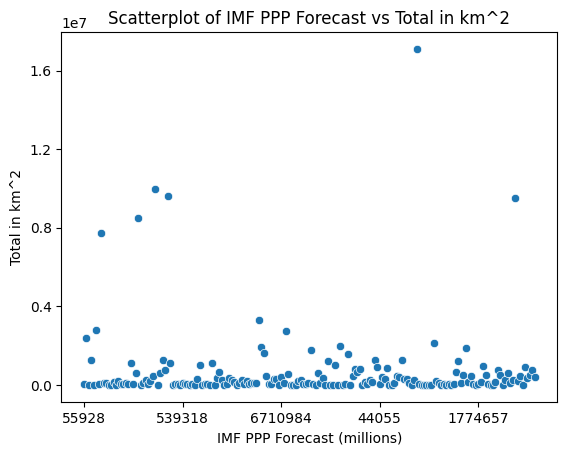

In [33]:
# Create a scatterplot
sns.scatterplot(data=country_df, x='IMF PPP Forecast (millions)', y='Total in km^2')

# Set plot title and labels
plt.title('Scatterplot of IMF PPP Forecast vs Total in km^2')
plt.xlabel('IMF PPP Forecast (millions)')
plt.ylabel('Total in km^2')

# Adjust the number of ticks on the x and y axes
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(6))

# Show the plot
plt.show()

##### Log Scale Version

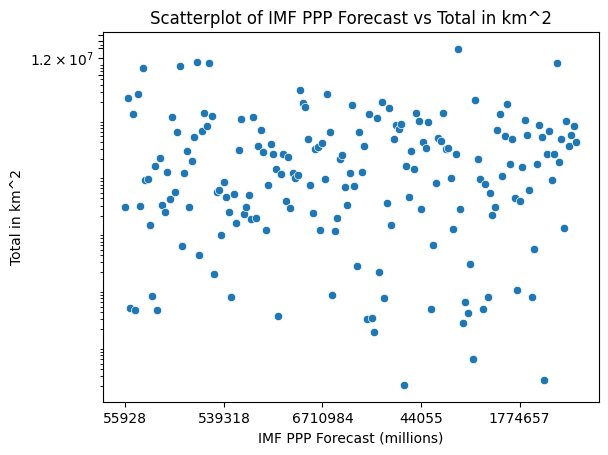

In [34]:
# Create a scatterplot
sns.scatterplot(data=country_df, x='IMF PPP Forecast (millions)', y='Total in km^2')

# Set plot title and labels
plt.title('Scatterplot of IMF PPP Forecast vs Total in km^2')
plt.xlabel('IMF PPP Forecast (millions)')
plt.ylabel('Total in km^2')

# Adjust the number of ticks on the x axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
# Set y-axis to logarithmic scale
plt.gca().set_yscale('log')
# Adjust the number of ticks on the y axis
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(6))

# Show the plot
plt.show()

#### Answer to Question 3: No correlation.

### Question 4: Is there a distinct difference in population density by region?

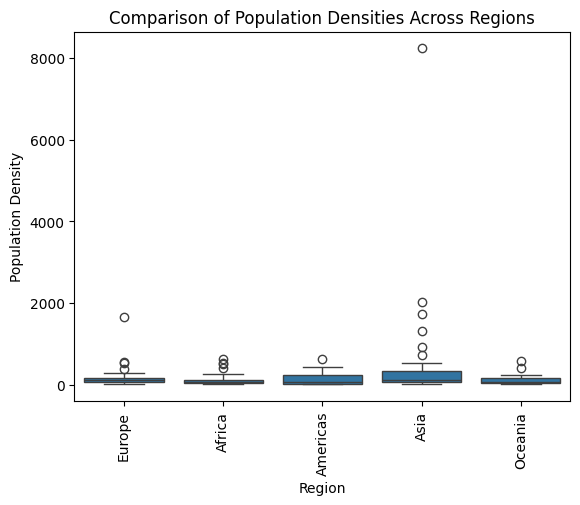

In [35]:
# Convert 'Population' and 'Land in km^2' to numeric
country_df['Population'] = pd.to_numeric(country_df['Population'], errors='coerce')
country_df['Land in km^2'] = pd.to_numeric(country_df['Land in km^2'], errors='coerce')

# Create a new column for population density
country_df['Population Density'] = country_df['Population'] / country_df['Land in km^2']

# Create a barplot comparing population densities across regions
sns.boxplot(data=country_df, x='Region', y='Population Density')

# Set plot title and labels
plt.title('Comparison of Population Densities Across Regions')
plt.xlabel('Region')
plt.ylabel('Population Density')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

##### Bar Plot Version

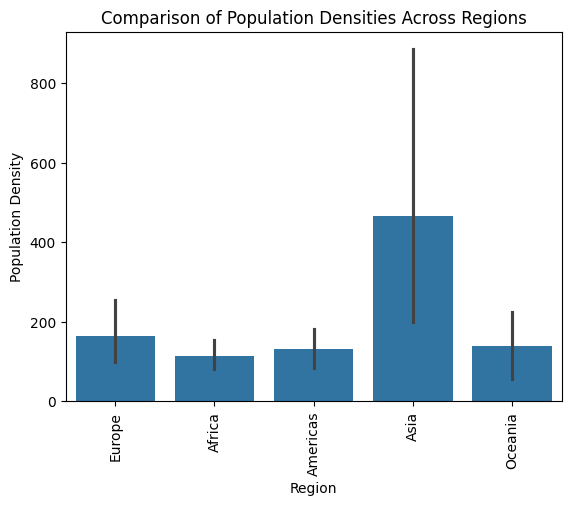

In [36]:
# Convert 'Population' and 'Land in km^2' to numeric
country_df['Population'] = pd.to_numeric(country_df['Population'], errors='coerce')
country_df['Land in km^2'] = pd.to_numeric(country_df['Land in km^2'], errors='coerce')

# Create a new column for population density
country_df['Population Density'] = country_df['Population'] / country_df['Land in km^2']

# Create a barplot comparing population densities across regions
sns.barplot(data=country_df, x='Region', y='Population Density')

# Set plot title and labels
plt.title('Comparison of Population Densities Across Regions')
plt.xlabel('Region')
plt.ylabel('Population Density')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Answer to Question 4: Most regions are roughly the same, however Asia has a wide disparity and on average a higher population density.